In [4]:
!pip install arch

     |████████████████████████████████| 727kB 2.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# check correlations of squared observations
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from arch import arch_model



In [6]:
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# square the dataset
squared_data = [x**2 for x in data]

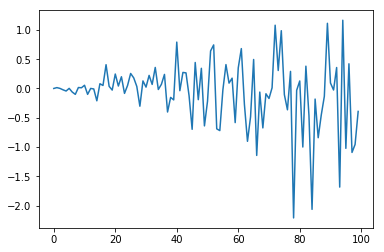

In [7]:
plt.plot(data)
plt.show()

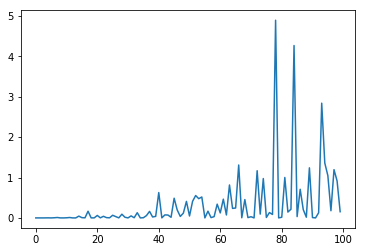

In [8]:
plt.plot(squared_data)
plt.show()

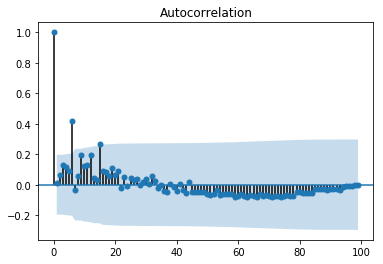

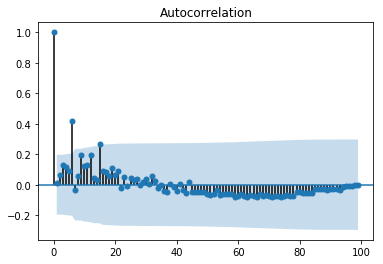

In [9]:
plot_acf(squared_data)

In [10]:
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

In [12]:
# ARCH model
arch_model = arch_model(train, mean='Zero', vol='ARCH', p=15)
arch_model_fit = arch_model.fit()
arch_model_fit.summary()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 41.42285909902891
Iteration:      2,   Func. Count:     37,   Neg. LLF: 38.58236083168643
Iteration:      3,   Func. Count:     56,   Neg. LLF: 36.70857630115163
Iteration:      4,   Func. Count:     75,   Neg. LLF: 35.64329949592393
Iteration:      5,   Func. Count:     94,   Neg. LLF: 34.388550595379975
Iteration:      6,   Func. Count:    113,   Neg. LLF: 31.603119552517732
Iteration:      7,   Func. Count:    132,   Neg. LLF: 30.180005155417653
Iteration:      8,   Func. Count:    150,   Neg. LLF: 28.719725365835618
Iteration:      9,   Func. Count:    169,   Neg. LLF: 25.76384751972326
Iteration:     10,   Func. Count:    189,   Neg. LLF: 25.732447890170047
Iteration:     11,   Func. Count:    208,   Neg. LLF: 25.649898218420457
Iteration:     12,   Func. Count:    227,   Neg. LLF: 25.560400051601007
Iteration:     13,   Func. Count:    247,   Neg. LLF: 25.546556809654177
Iteration:     14,   Func. Count:    266,   Neg. LLF: 25

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                       ARCH   Log-Likelihood:               -25.4775
Distribution:                  Normal   AIC:                           82.9550
Method:            Maximum Likelihood   BIC:                           122.952
                                        No. Observations:                   90
Date:                Mon, Apr 13 2020   Df Residuals:                       74
Time:                        23:22:30   Df Model:                           16
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.5741e-03  1.871e-02      0.191      0.848 [-3.309e-02,4.024e-02]
alpha[1]       0.0000      0.362      0.000      1.000      [ -0.710,  0.710]
alpha[2]   2.8311e-03      0.505  5.608e-03      0.996      [ -0.987,  0.992]
alpha[3]       0.3414      0.240      1.422      0.155      [ -0.129,  0.812]
alpha[4]       0.0000      0.517      0.000      1.000      [ -1.013,  1.013]
alpha[5]       0.0457      0.123      0.373      0.709      [ -0.195,  0.286]
alpha[6]       0.1730      0.130      1.335      0.182   [-8.097e-02,  0.427]
alpha[7]       0.0000      0.681      0.000      1.000      [ -1.335,  1.335]
alpha[8]       0.1720      0.267      0.644      0.519      [ -0.351,  0.695]
alpha[9]       0.0109      0.263  4.145e-02      0.967      [ -0.504,  0.525]
alpha[10]      0.0000      0.452      0.000      1.000      [ -0.887,  0.887]
alpha[11]      0.0000      0.190      0.000      1.000      [ -0.372,  0.372]
alpha[12]      0.2542      0.619      0.411      0.681      [ -0.958,  1.467]
alpha[13]      0.0000      0.216      0.000      1.000      [ -0.423,  0.423]
alpha[14]      0.0000      0.274      0.000      1.000      [ -0.538,  0.538]
alpha[15]      0.0000      0.299      0.000      1.000      [ -0.586,  0.586]
=============================================================================

Covariance estimator: robust
"""

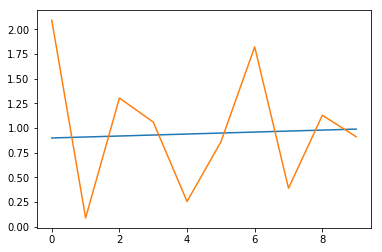

In [15]:
# forecast the test set
predictions = arch_model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:])
# plot forecast variance
plt.plot(predictions.variance.values[-1, :])
plt.show()

In [ ]:
# GARCH model
garch_model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
garch_model_fit = garch_model.fit()
garch_model_fit.summary()

In [ ]:
# forecast the test set
predictions = garch_model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:])
# plot forecast variance
plt.plot(predictions.variance.values[-1, :])
plt.show()